<a href="https://colab.research.google.com/github/EthanLampone/AI-CLASS-FALL-2025/blob/main/HW2/Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## ETHAN LAMPONE
## HOMEWORK 2 - PROBLEM 2
## CSC 362 - AI
## 26 SEPTEMBER 2025

In [ ]:
from collections import deque
## THIS PACKAGE BELOW IS ONE THAT I FOUND FROM A QUICK GOOGLE SEARCH TO HELP W/
## THE CREATION OF DIFFERENT GRAPHS TO SHOW WHAT I AM DOING IS SIMILAR TO THAT
## OF THE HOMEWORK DISCRIPTION
import networkx as nx
## SIMPLY USED TO SHOW THE GRAPH AFTER ITS MADE
import matplotlib.pyplot as plt

In [ ]:
## FIRST THING FIRST, WE NEED TO CREATE THE FRIEND GRAPH TO USE
friends = {
    'Adam' : ['Maria'],
    'Maria': ['Adam','Sophia','Maya','David'],
    'Sophia': ['Maria','Maya'],
    'Maya': ['Sophia','Maria','David'],
    'David': ['Maria','Maya']
}

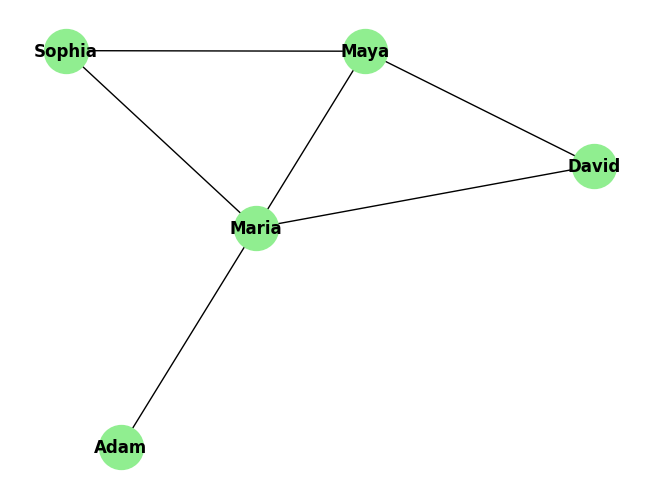

In [ ]:
## WAY TO VISUALZIE THE GRAPH IN PYTHON JUST TO SEE THE GRAPH
G = nx.Graph(friends)
nx.draw(G, with_labels=True, node_color='lightgreen', font_weight='bold',
        font_size='12', node_size = 1000)
plt.show() # SHOW GRAPH

In [ ]:
## FUNCTION TO FIND POTENTIAL FRIENDS W/N A SOCIAL NETWORK GRAPH
def PotentialFriends(graph, root):
  # SET TWO EMPTY LISTS FOR ROOT FRIENDS AND NEW FRIENDS; CREATE A QUEUE W/ DEQUE
  root_friends, new_friends, queue = set(), set(), deque([(root, 0)])

  # ITERATE THROUGH THE QUEUE WHILE THERE ARE ATTRIBUTES WITHIN IT
  while queue:
    # GET THE FRIEND; LVL MIGHT NOT BE NECESSARY HERE
    friend, lvl = queue.popleft()
    # LOOK TO SEE IF THE FRIEND IS ASSOCIATED W/ THE ROOT PERSON ("Adam", etc.)
    if friend in graph.get(root,[]):
      root_friends.add(friend) # Add value to root_friends IF ABOVE IS THE CASE
    # LOOK TO SEE IF THE FRIEND IS NOT ASSOCIATED W/ THE ROOT PERSON AND CHECK
    # IF THE PERSON IS NOT THE ROOT PERSON
    if friend not in graph.get(root,[]) and friend != root:
      new_friends.add(friend) # ADD "friend" IF ABOVE CONDITION IS TRUE

    # SAME FOR LOOP SIMILAR TO PROBLEM #1, WHERE WE GET THE "FRIENDS" OF THE
    # CURRENT FRIEND AND APPEND THEM TO THE QUEUE
    for amigo in graph.get(friend,[]):
      if amigo not in root_friends:
        root_friends.add(amigo) #
        queue.append((amigo, lvl + 1)) # Append a tuple of (friend, level)

  # RETURN THE LIST OF NEW "POTENTIAL" FRIENDS
  return new_friends

In [ ]:
PotentialFriends(friends, 'Adam')

{'David', 'Maya', 'Sophia'}

In [ ]:
PotentialFriends(friends, "David")

{'Adam', 'Sophia'}

In [ ]:
PotentialFriends(friends, 'Sophia')

{'Adam', 'David'}

**BELOW, WE WILL CREATE A GRAPH REPRESENTING THE RIGHT-HAND GRAPH WITHIN THE
HOMEWORK. THIS ONE INCLUDES THE DOTTED-LINES TO REPRESENT THE POTENTIAL
FRIENDS THAT CAN BE FORMED DOWN THE LINE.**

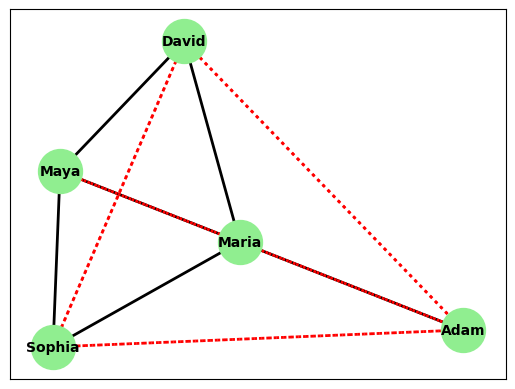

In [ ]:
# GET SOLID EDGES (PRINTED LINES) FROM GRAPH ABOVE (THEY ALREADY EXIST)
solid_edges = list(G.edges())

# GET POTENTIAL FRIENDS FOR EACH PERSON WE FOUND; CREATE DOTTED EDGES
dotted_edges = []
for person in friends:
    potential_friends = PotentialFriends(friends, person)
    for potential_friend in potential_friends:
        # ENSURE THE EDGE IS NOT ALREADY A SOLID EDGE AND ADD ONLY ONCE
        if (person, potential_friend) not in solid_edges and (potential_friend, person) not in solid_edges:
            dotted_edges.append((person, potential_friend))

# DEFINE NODE POSITIONS FOR CONSISTENT LAYOUT & USE THE EXISTING POSITION IF
# IT EXISTS
if 'pos' not in locals():
    pos = nx.spring_layout(G)

# DRAW NODES
nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=1000)
# DRAW SOLID EDGES
nx.draw_networkx_edges(G, pos, edgelist=solid_edges, width=2,
                       edge_color='black', style='solid')
# DRAW DOTTED EDGES
nx.draw_networkx_edges(G, pos, edgelist=dotted_edges, width=2,
                       edge_color='red', style='dotted')
# DRAW LABE;S
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold',
                        font_color='black')
plt.show()